# CA2 - Classification Using Neural Networks

In [1]:
# Load the Libraries for data manipulation
import pandas as pd
import numpy as np

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

In [2]:
# Load the csv file
df = pd.read_csv('glass_data.csv')

In [3]:
# Check first 5 record
df.head()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# check the row and column count
df.shape

(214, 11)

In [5]:
#Check data type for all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
# check for any null values or missing data
df.isnull().sum()

id      0
ri      0
na      0
mg      0
al      0
si      0
k       0
ca      0
ba      0
fe      0
type    0
dtype: int64

In [7]:
# check value count for column 'ID'
# print(df['id'].value_counts(), '\nNo of Unique values are:', df['id'].nunique())

In [8]:
# check value count for column 'type'
# print(df['type'].value_counts(), '\nNo of Unique values are:', df['type'].nunique())

In [9]:
# Display unique values in each column and their count
for col in df:
    unique_value = df[col].value_counts()
    print(f"Unique Number of value in Column '{col}' is '{df[col].nunique()}':")
    print("----------------------")
    print(unique_value.to_string())
    print("\n")

Unique Number of value in Column 'id' is '214':
----------------------
id
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1

In [10]:
# drop the column 'ID' since it has all unique value and only incremental number which denotes row count
df_original = df
df = df.drop('id', axis=1)

In [11]:
# check the row and column count
df.shape

(214, 10)

In [12]:
# check for duplicate values
df.duplicated().sum()

np.int64(1)

In [13]:
# find the row no where duplicated entry exists. this is marked with True
df.duplicated().to_string()

'0      False\n1      False\n2      False\n3      False\n4      False\n5      False\n6      False\n7      False\n8      False\n9      False\n10     False\n11     False\n12     False\n13     False\n14     False\n15     False\n16     False\n17     False\n18     False\n19     False\n20     False\n21     False\n22     False\n23     False\n24     False\n25     False\n26     False\n27     False\n28     False\n29     False\n30     False\n31     False\n32     False\n33     False\n34     False\n35     False\n36     False\n37     False\n38     False\n39      True\n40     False\n41     False\n42     False\n43     False\n44     False\n45     False\n46     False\n47     False\n48     False\n49     False\n50     False\n51     False\n52     False\n53     False\n54     False\n55     False\n56     False\n57     False\n58     False\n59     False\n60     False\n61     False\n62     False\n63     False\n64     False\n65     False\n66     False\n67     False\n68     False\n69     False\n70     False\n71   

In [14]:
# display the duplicated row number and content
dup = df[df.duplicated()]
print(dup)

         ri     na    mg    al     si     k    ca   ba   fe  type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1


In [15]:
# drop the duplicated entry leaving first occurence
df.drop_duplicates(keep= 'first', inplace=True)
df.shape

(213, 10)

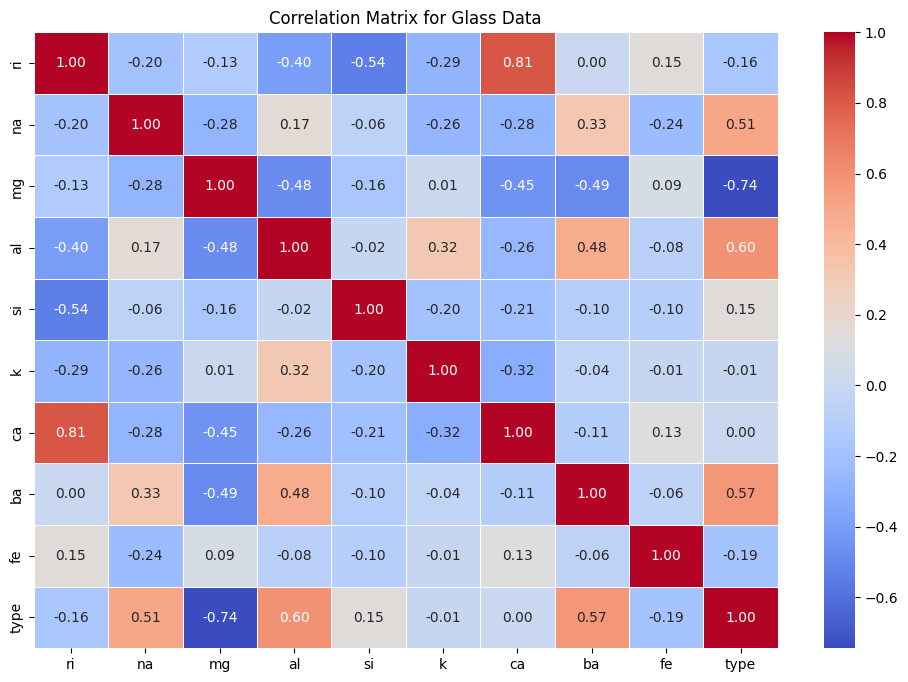

In [16]:
# Correlation heatmap to check the features that are of high importance to dependent variable
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Glass Data")
plt.show()

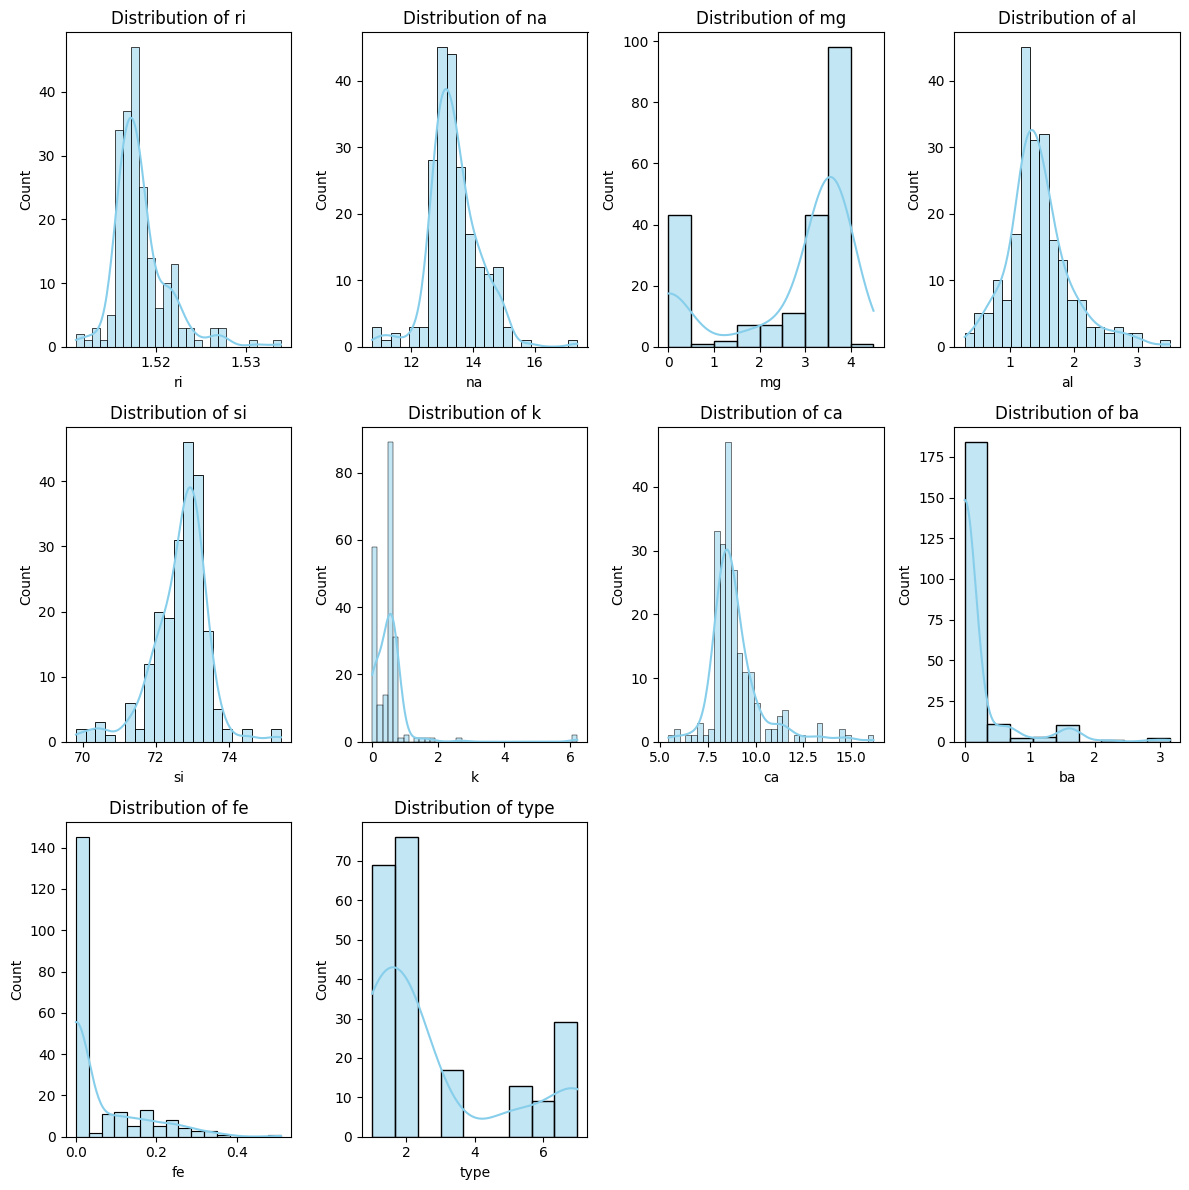

In [19]:
# Distribution plot for all columns
#df.hist()

# Adjust grid size for the number of features
n_features = len(df.columns)
n_cols = 4  # Number of columns
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Dynamic number of rows

plt.figure(figsize=(12, n_rows * 4))
for i, feature in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a grid of subplots dynamically
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [10]:
# Check Descriptive Statistics
df.describe()

,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000
